# Web Crawler

Collect text data from the PTT forum, process the article texts, and finally create a word cloud for a quick overview of the topics in these collected texts.

## Crawling Data from PTT

In [1]:
import requests
from bs4 import BeautifulSoup as soup  # HTML data structure
from lxml import etree


# extract article hyperlinks from an index page
def extractArtLinks(url):
    r = requests.get(url, cookies={'over18': '1'})
    page_soup = soup(r.text, "html.parser")
    containers = page_soup.findAll("div", {"class": "r-ent"})
    art_links = []
    for container in containers:
        # Finds all link tags "a" from within the first div.
        art_link = container.find('a')
        if art_link:
            #print(art_link['href'])
            #print(container.find('div',{'class':'title'}).get_text())
            art_meta = container.find('div', {'class': 'meta'})
            #print(art_meta.find('div',{'class':'author'}).get_text())
            #print(art_meta.find('div',{'class':'date'}).get_text())

            art_links.append({
                'push':
                container.find('div', {
                    'class': 'nrec'
                }).get_text(),
                'title':
                container.find('div', {
                    'class': 'title'
                }).get_text().strip(),
                'date':
                art_meta.find('div', {
                    'class': 'date'
                }).get_text(),
                'author':
                art_meta.find('div', {
                    'class': 'author'
                }).get_text(),
                'link':
                art_link['href'],
                'text':
                extractArtText('https://www.ptt.cc' + art_link['href'])
            })

    return (art_links)


# find the previous index page link
def findPrevIndex(url):
    r = requests.get(url, cookies={'over18': '1'})
    page_soup = soup(r.text, "html.parser")
    btn = page_soup.select('div.btn-group > a')
    up_page_href = btn[3]['href']
    next_page_url = 'https://www.ptt.cc' + up_page_href
    return (next_page_url)


# extract article contents from  the article hyperlink
def extractArtText(url):
    r = requests.get(url, cookies={'over18': '1'})
    #page_soup = soup(r.text, "lxml")
    #print(page_soup.find("div",{"id":"main-content"}).get_text())
    #art_text=page_soup.select('div#main-content', limit=1)[0].text
    content = r.content.decode()
    html = etree.HTML(content)
    art_text = html.xpath(
        "//div[@id='main-content']/text()[not(self::div|self::span[@class='f2'])]"
    )
    return ''.join(list(art_text))

In [2]:
## Debug Use

# url = 'https://www.ptt.cc/bbs/Food/M.1602332821.A.6F3.html'
# r = requests.get(url, cookies={'over18': '1'})
# #page_soup = soup(r.text, "lxml")
# #print(page_soup.find("div",{"id":"main-content"}).get_text())
# #art_text=page_soup.select('div#main-content', limit=1)[0].text
# content = r.content.decode()
# html = etree.HTML(content)
# art_text = html.xpath(
#     "//div[@id='main-content']/text()[not(self::div|self::span[@class='f2'])]")

# print(''.join(list(art_text)))

```{note}
For CSS selector, don't know how to set conditional criteria to select only texts under div#main-container but not those included in the child div.article-metaline and span.f2.

So here I use the XPath, which requires the lxml package.
```

In [3]:
# main()
num_of_index_page = 5
board_name = 'Food'
url = 'https://www.ptt.cc/bbs/{}/index.html'.format(board_name)
all_links = []
for page in range(1, num_of_index_page):
    all_links = all_links + extractArtLinks(url)
    url = findPrevIndex(url)
len(all_links)

66

In [4]:
type(all_links[2])
print(all_links[2])

{'push': '', 'title': '[食記] 台北萬華 華西街夜市 小王、阿義、源芳', 'date': '10/12', 'author': 'scissorstone', 'link': '/bbs/Food/M.1602459971.A.7DC.html', 'text': '\n圖文連結: \n\n1. 阿義滷肉飯\n地址: 台北市萬華區華西街15-1號\n電話: 0958 860 213\n營業時間: 11:00–20:00 (星期一公休)\n平均價位: 30-300\n\n滷肉飯\n手切皮油為主的肉燥\n膠質含量豐富\n個人口味上覺得紅蔥頭味道占比過重\n口味上偏淡，希望再鹹甜一些\n\n\n清燙魚皮\n魚皮有一點點腥味\n但搭配化學芥末與鹹甜醬油膏後\n問題少了很多\n( 對，沒錯虱目魚就是要搭化學芥末)\n\n\n滷白菜\n加入膨皮一起滷的古早風味\n切絲豆皮提供不同的口感\n但入味程度還是不足\n\n\n油豆腐、豆腐、滷鴨蛋\n油豆腐好好吃，兩塊10元佛心價\n香氣十足沒有油耗味\n醬汁也充分入味！\n\n豆腐與鴨蛋沒有滷透很普通\n\n————————————————————————————————\n\n2. 小王煮瓜（原小王清湯瓜仔肉）\n地址: 台北市萬華區華西街17之4號\n電話: 02 2370 7118\n營業時間: 09:30–20:00 (星期二公休)\n平均價位: 30-300\n\n\n滷肉飯、滷鴨蛋\n照片中就可看到醬色明顯比阿義重\n個人口味上，甜味稍嫌不足\n讓醬汁吃起來有些死鹹\n吃完後舌頭會殘留鹹味的麻痺感\n\n鴨蛋入味好吃\n\n\n瓜仔肉湯\n豬後腿肉做成的肉羹口感很好\n明確的肉感感受得出真材實料\n瓜仔肉湯再甜一些就好了 (很台南人的發言)\n\n\n————————————————————————————————\n\n\n3. 源芳刈包\n地址: 台北市萬華區華西街17-2號\n電話: 02 2381 0249\n營業時間: 12:00–22:00 (星期一公休)\n平均價位: 50-100\n\n\n刈包 50元\n刈包還可以\n但跟記憶中的味道已經相去甚遠\n首先是主角焢肉\n乍看之下，醬色不深 (跟幾年前相比)\n滷汁沒有完全滷透\n重要的配角酸菜\n跟別人不同的是這裡的酸菜\n包進麵皮

In [5]:
print('Push: {push:s} \n'
      'title: {title:s} \n'
      'date: {date:s} \n'
      'author: {author:s} \n'
      'link: {link:s} \n'
      'text: {text:.20} \n'.format(**all_links[3]))

Push:  
title: [公告] Food板 板規 V3.91 
date: 12/16 
author: Dilbert 
link: /bbs/Food/M.1355673582.A.5F7.html 
text: 
                    



## Text Normalization

In [6]:
import sys
sys.path.insert(1, '../nlp')
import text_normalizer_zh as tn

In [7]:
print(all_links[3]['text'])


                    
                                                          2017.6.4修訂


1.置入水桶禁言期滿，將由系統自動解除限制，若到期而未解禁請寫信詢問板主。

2.文章被刪除者，若欲了解刪文原因或尋回備份，請洽精華區的資源回收桶。








             






    ：Chat82gether板、e-Shopping板
    ：Instant_Food 即時食物板
    ：fastfood 速食板
    ：CVS 便利商店板、hypermall 大賣場板
    ：Snacks板、Sweet板
    ：Drinks板

    張貼第1條各項所列之文章，除原文刪除，視情況可併處。


註：若對板規1之(1)涵攝範圍不夠清楚，請參閱精華區 和 
    有兩篇更詳細的補充說明。





  ，
    但需配合下列事項：
    

    未配合上述規定之店家廣宣，初犯，劣退＋水桶禁言60天；
    累犯，劣退＋終身水桶。推文違規廣宣者，終身水桶。



  Food板目前有限度的開放廣宣只接受兩種形式：

  

  網路行銷、廣告公司或第三方(如銀行、網站)與餐廳合辦的間接合作活動不予開放。




  接受餐廳招待試吃者，張貼食記必須誠實揭露，並以為標題，勿自創標題。
    與『』有關的廣宣，不分張貼者為，
    須一併計入廣宣額度限制－
    比照廣宣規定辦理，但團購服務缺失抱怨文則不受限制。

    欲張貼試吃廣宣者，請自行查詢板上是否已有未期滿的同店廣宣，
    若已有則不得張貼。違反上述規定者，刪除試吃食記，。
    累犯者，；，
    原受處分ID與分身ID處分。

註：1.精華區 對本板可接受的試吃種類有進一步說明，歡迎參閱。

    2.『』張貼限制期間，係指可開放新一篇廣宣。
      例：某餐廳於在板上有廣宣下次可貼廣宣時間：。
                  在板上有廣宣下次可貼廣宣時間：。
      特例：      在板上有廣宣下次可貼廣宣時間：。(因9月無31日)
                  間張貼的廣宣，統一於開放張貼下一篇廣宣。

    3.『』定義，以同

In [8]:
raw = [art['text'] for art in all_links if len(art) != 0 and len is not None]
raw_normalized = tn.normalize_corpus(raw)

Building prefix dict from /Users/Alvin/GoogleDrive/_MySyncDrive/RepositoryData/data/jiaba/dict.txt.jiebatw.txt ...
Loading model from cache /var/folders/n7/ltpzwx813c599nfxfb94s_640000gn/T/jieba.u1b52b47246a0f2e6497af6bbe107adac.cache
Loading model cost 0.575 seconds.
Prefix dict has been built successfully.


In [9]:
import pandas as pd

corpus_df = pd.DataFrame({"raw": raw, "normalized": raw_normalized})

In [10]:
corpus_df.head(2)

,raw,normalized
0,\n 餐廳名稱：Coffee underwater 特色創意咖啡(附菜單)\n 消費...,餐廳 名稱 特色 創意 咖啡 附 菜單 消費 時間 年 月 地址 台北市 中山區 龍江路 巷...
1,\n 餐廳名稱：一品魚麵\n 消費時間：2020年/10月\n 地址：桃園市中壢...,餐廳 名稱 一品 魚 麵 消費 時間 年 月 地址 桃園市 中壢區 成章 二街 號 電話 營...


In [11]:
raw[5]

'\n◆投票結果:(共有 220 人投票,每人最多可投 1 票)\n    選    項                                   總票數  得票率  得票分布\n    刪文後於板面註記(原制度)                    88 票  40.00%   40.00%\n  \n\n 投票結果已確定，未來板面刪文後處置措施將使用下列方案：\n\n \n\n 作法：\n   1.精華區內設置資源回收桶，子目錄則為各類刪文理由，\n     板面上的違規文章遭刪除後將置入資源回收桶內各子目錄。\n\n   2.板面配套措施：屆時被刪除的文章標題，將由板主手動改為全無內容\n     的空洞，以與板友自刪的文章作區隔。\n\n   3.由於板面註記將改為空洞，故未來板主不再提供精華區路徑指引服務。\n\n   4.欲確認刪除者為哪一位板主，請檢視該文章的編選者便可得知。\n\n編號    標      題                                  編    選      日    期\n  1. ◇ [請益] 請問高雄哪裡有不錯的合菜餐廳呢       bluefish     [09/17/05]\n  2. ◇ 請問一下-台北市哪裡有好吃的壓（捷運附近or23 Dilbert      [09/18/05]\n\n\n\n───────────────────────────────────────\n\n  1.首先感謝許多板友們的鼓勵，在這個管理環境越趨艱難的當下，\n    諸位的鼓勵對於越來越常覺得電池快乾掉的板主們是相當受用的，\n    無法一一回覆，僅以此圖聊表管理現況與心中謝意。XD\n\n    \n\n  2.\n\n    \n\n    \n\n    \n\n    大板易生紛爭，所以其實還在使用板面刪文註記的時代，板主便已經開始將\n    板面上的刪文放在精華區的隱藏目錄中以為存證，現在只是多了一個將其放\n    入依刪文理由分門別類的子目錄的動作並公開之，把板面註記和幫忙指引精\n    華區的時間省下來挪去做這件事，其實還OK啦～\n\n    未來如果可以順利徵得第三位專司執法的板主，應該就更是勝任愉快了。\n\n  3.\n\n    \n\n    目前暫時無此打算

In [12]:
raw_normalized[4]

'由於 有多位 版友 在 版 上 屢次 提到 標題 未 附上 地點 在 閱讀 搜尋 上常 造成 不便 在 此 懇請 各位 熱心 發表 文章 分享 資訊 的 版友 範例 食記 新竹 竹北 牛肉麵 真是 太令 人 銷魂 了 情報 台北 東區 屋 又 爆炸 了 作者 可 按大寫 修正 另外 也 範例 餐廳 名稱 地址 電話 營業 時間 價位 範圍 每人 請 各位 大大 發表 文章 時 盡量 幫忙 填寫 對版友 來 說 詳細 的 資料 會 更 方便 按圖索驥 對版僕 來 說 也 能 更 提高 收錄 文章 的 效率 請 大家 高抬貴手 多多 幫忙 以上 為 暫行 版規 大家 如有 修正 意見 請 推文 支持 或 來信 指教 謝謝 大家 版僕'

- [Unicode List](https://en.wikipedia.org/wiki/List_of_Unicode_characters)
- [Unicode Categories](https://unicodebook.readthedocs.io/unicode.html)

In [13]:
text = raw[0]
text

'\n   餐廳名稱：Coffee underwater 特色創意咖啡(附菜單)\n   消費時間：109年9月\n   地址：台北市中山區龍江路106巷4號\n   電話： 02 2506 6520\n   營業時間：9:30~19:00\n   每人平均價位：130\n   有無包廂：無\n   推薦菜色：髒髒\n\n\n圖文好讀板：\n\n\n辛苦地買完犁記，吃完 東館牛 後，來到了 Coffee underwater\n簡單的外型設計，原以為是間小店，沒想到一推開門，別有一番洞天\n\n店外有一桌裡面的空間則是通到隔壁巷，感覺是兩間打成一間，很長，\n但因為兩面都有採光，所以不至於過度昏暗\n\n藍色的色彩，妝點整個店家，連外帶杯抑是如此\n\n櫥窗內的甜點\n\n櫃台旁有聞香罐，可選擇自己喜愛的口味\n\n\n除了販賣的商品外，也提供書本，很適合在這待上一整天\n\n\n販賣貓、犬相關產品\n\n水是自助式的，但因為水瓶容量較小，且龍頭位置較高所以到後面裝水都要用傾斜\n的方式，有些不便\n\n\nMENU\n\n 創意飲品  濃縮 茶  氣泡飲\n\n\n單品手沖\n\n\n髒髒 130元\n本想說不就是濃縮加牛奶嗎？怎麼和拿鐵價位差那麼多，後來詢問之下才知道他的濃縮\n液是用冷萃的方式做萃取，所以口感較為不一樣。\n拿到成品後，除了飲料是冰的外，杯墊整個一直到喝完都是維持冰冰的狀態，且\n喝起來的口感很濃醇，咖啡味很棒，很順口\n\n\n柑霖 150元\n這杯其實是因為看到GOOGLE 評價人家貼的照片才點的，因為挺吸睛的，所以詢問之下才\n知道這叫柑霖，立馬點一杯~~\n飲料送上來時，店家有特別交代別攪拌太過頭，不然會溢出來~~~然後上頭的果乾\n可食用，但要避免吃到皮，因為會苦！一開始喝它真的是小心翼翼， 酸酸\n苦苦很多層次，後來待飲料沒那麼滿時，就開始攪拌，結果飲料就波波波，\n一直滿出來，恰好到杯緣而已，後來我才意會到，這是加了氣泡水Bubble\n\n由於點餐時沒仔細看MENU裡面的介紹，只看人家的照片就點，個人不愛氣泡飲，所以\n不是飲料不好喝，而是我不愛氣泡飲，若是喜歡氣泡飲的應該會喜歡它，不然網路上\n不會那麼多人推薦\n\n\n原味起士蛋糕 120元\n蠻濕潤的起士蛋糕，不會乾，吃起來帶些梅子粉味。\n店家還很用心在一旁灑下一些碎花

In [14]:
import unicodedata

result = ''.join(ch for ch in text
                 if unicodedata.category(ch)[0] not in ['P', 'S'])
result

'\n   餐廳名稱Coffee underwater 特色創意咖啡附菜單\n   消費時間109年9月\n   地址台北市中山區龍江路106巷4號\n   電話 02 2506 6520\n   營業時間9301900\n   每人平均價位130\n   有無包廂無\n   推薦菜色髒髒\n\n\n圖文好讀板\n\n\n辛苦地買完犁記吃完 東館牛 後來到了 Coffee underwater\n簡單的外型設計原以為是間小店沒想到一推開門別有一番洞天\n\n店外有一桌裡面的空間則是通到隔壁巷感覺是兩間打成一間很長\n但因為兩面都有採光所以不至於過度昏暗\n\n藍色的色彩妝點整個店家連外帶杯抑是如此\n\n櫥窗內的甜點\n\n櫃台旁有聞香罐可選擇自己喜愛的口味\n\n\n除了販賣的商品外也提供書本很適合在這待上一整天\n\n\n販賣貓犬相關產品\n\n水是自助式的但因為水瓶容量較小且龍頭位置較高所以到後面裝水都要用傾斜\n的方式有些不便\n\n\nMENU\n\n 創意飲品  濃縮 茶  氣泡飲\n\n\n單品手沖\n\n\n髒髒 130元\n本想說不就是濃縮加牛奶嗎怎麼和拿鐵價位差那麼多後來詢問之下才知道他的濃縮\n液是用冷萃的方式做萃取所以口感較為不一樣\n拿到成品後除了飲料是冰的外杯墊整個一直到喝完都是維持冰冰的狀態且\n喝起來的口感很濃醇咖啡味很棒很順口\n\n\n柑霖 150元\n這杯其實是因為看到GOOGLE 評價人家貼的照片才點的因為挺吸睛的所以詢問之下才\n知道這叫柑霖立馬點一杯\n飲料送上來時店家有特別交代別攪拌太過頭不然會溢出來然後上頭的果乾\n可食用但要避免吃到皮因為會苦一開始喝它真的是小心翼翼 酸酸\n苦苦很多層次後來待飲料沒那麼滿時就開始攪拌結果飲料就波波波\n一直滿出來恰好到杯緣而已後來我才意會到這是加了氣泡水Bubble\n\n由於點餐時沒仔細看MENU裡面的介紹只看人家的照片就點個人不愛氣泡飲所以\n不是飲料不好喝而是我不愛氣泡飲若是喜歡氣泡飲的應該會喜歡它不然網路上\n不會那麼多人推薦\n\n\n原味起士蛋糕 120元\n蠻濕潤的起士蛋糕不會乾吃起來帶些梅子粉味\n店家還很用心在一旁灑下一些碎花瓣\n\n\n\n總評\n在龍江路周遭的巷子中不乏類似有特色的咖啡店住這兒的人真幸福\n店家給人的感覺是舒適的畢竟寬敞的空間桌與桌間不會靠得太

## Word Cloud

In [15]:
from collections import Counter
import imageio
from nltk.tokenize import WhitespaceTokenizer
from wordcloud import WordCloud, ImageColorGenerator
from matplotlib import pyplot as plt

In [16]:
## Check font paths
## !fc-list :lang=zh

ws = WhitespaceTokenizer()

tokens = [ws.tokenize(text) for text in raw_normalized]

In [17]:
from collections import Counter

# corpus token freq
tokens_freq = Counter(sum(tokens, []))
sorted(tokens_freq.items(), key=lambda x: x[1], reverse=True)

# corpus token freq per document
tokens_freq_per_doc = [Counter(wt) for wt in tokens]

# corpus token docfreq
tokens_df = Counter()

# map(tokens_df.update, (tfpd.keys() for tfpd in tokens_freq_per_doc))

for tfpd in tokens_freq_per_doc:
    tokens_df.update(tfpd.keys())

print(tokens_df)

Counter({'的': 66, '時間': 64, '是': 64, '在': 62, '地址': 60, '營業': 60, '有': 60, '也': 60, '了': 57, '電話': 56, '就': 56, '號': 55, '很': 55, '人': 55, '餐廳': 53, '消費': 53, '都': 53, '會': 53, '來': 51, '吃': 51, '名稱': 50, '可以': 50, '月': 49, '不': 48, '但': 47, '年': 46, '上': 46, '口感': 45, '我': 45, '價位': 44, '說': 42, '和': 41, '到': 40, '好': 40, '覺得': 40, '每人': 39, '平均': 38, '圖文': 38, '要': 38, '讓': 38, '版': 38, '推薦': 37, '就是': 37, '不錯': 36, '沒有': 36, '又': 36, '好吃': 35, '因為': 34, '真的': 34, '我們': 34, '不過': 34, '菜單': 33, '無': 33, '口味': 33, '元': 33, '還有': 33, '後': 32, '一': 32, '味道': 32, '用餐': 32, '才': 31, '個': 31, '想': 31, '菜色': 30, '店家': 30, '沒': 30, '吃起來': 30, '多': 30, '搭配': 30, '以': 30, '對': 30, '有無': 29, '包廂': 29, '小': 29, '不會': 29, '還': 29, '非常': 29, '還是': 29, '再': 29, '中': 29, '跟': 29, '去': 29, '比較': 29, '像': 29, '刷卡': 29, '可': 28, '特別': 28, '喜歡': 28, '店內': 28, '這': 27, '他': 27, '一樣': 27, '另外': 27, '餐點': 27, '雖然': 27, '有點': 27, '可否': 27, '所以': 26, '選擇': 26, '自己': 26, '時': 26, '看': 26, '更': 26, '一個': 26, '台

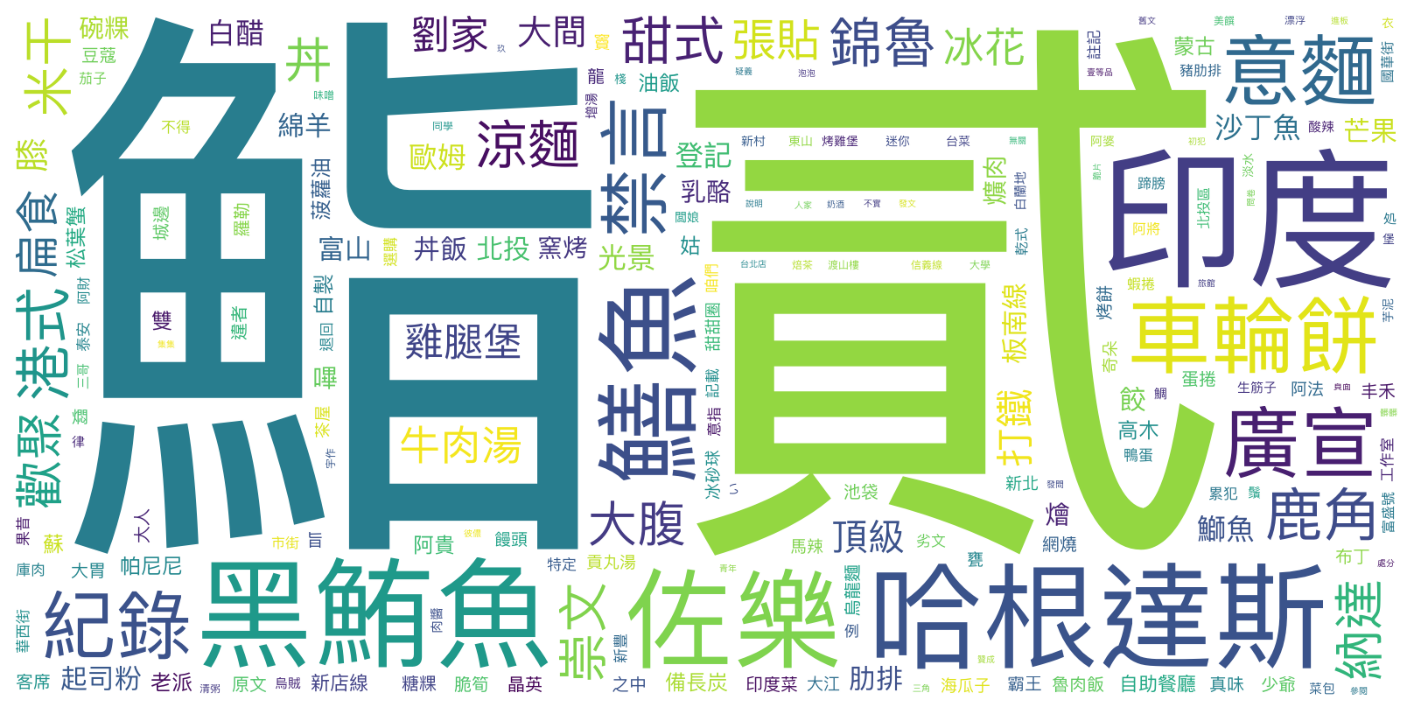

In [18]:
## Load stopwords
with open(
        '../../../RepositoryData/data/stopwords/tomlinNTUB-chinese-stopwords.txt'
) as f:
    stopwords = [w.strip() for w in f.readlines()]

# Create stopwords ad hoc
stopwords = set([
    '文章', '食記', '水桶', '刪除', '投票', '刪文', '連結', '板面', '板主', '規定', '違規', '使用',
    '所以', '禁止', '天', '票'
])

# Cutoff based on docfreq and stopwords
words2plot = dict([(w, tokens_freq[w]) for w, df in tokens_df.items()
                   if df < 2 and w not in stopwords and tokens_freq[w] >= 2])

wordcloud = WordCloud(font_path="/System/Library/Fonts/PingFang.ttc",
                      background_color='white',
                      stopwords=stopwords,
                      width=1600,
                      height=800,
                      margin=20)
# wordcloud.generate(' '.join([w for w in tokens_unnest if w not in stopwords]))
wordcloud.generate_from_frequencies(words2plot)
plt.figure(figsize=(20, 10), facecolor='w')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=1)
plt.show()
#plt.savefig('../data/twp-wordcloud2.png', facecolor='k', bbox_inches='tight')

:::{admonition} Exercise
How to seperate post texts from push texts?
:::
